<a href="https://colab.research.google.com/github/rafaborneo/graph_course/blob/main/Borneo_GRAFOS_PracticoParte_primera_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE GRAFOS Práctico 

RAFAEL BORNEO BENISTA

PRIMERA MITAD DE LA MATERIA: Puntos 1,2,3,

En este práctico, correspondiente a la primera mitad de la materia, trabajaremos con un dataset extraído de Twitter. La idea es emplear los conceptos de grafos vistos en clase sobre un caso real de actualidad.

## Dataset

El dataset consiste en un conjunto de hilos de tweets, con un total de ~150000 tweets, extraídos entre Enero y Marzo de 2021. La temática de los mismos está referida a la vacunación contra el covid-19 en Argentina.

Pueden descargar el dataset del siguiente [link](https://drive.google.com/file/d/1X_qKsE8muAnom2tDX4sLlmBAO0Ikfe_G/view?usp=sharing).

### Campos

- **created_at:** Fecha del tweet
- **id_str:** ID del tweet
- **full_text:** Contenido del tweet
- **in_reply_to_status_id:** ID del tweet inmediatamente anterior en el hilo
- **in_reply_to_user_id:** Autor del tweet inmediatamente anterior en el hilo
- **user.id:** Autor del tweet
- **user_retweeters:** Lista de ID de usuarios que retweetearon el tweet
- **sentiment:** Etiquetado manual que indica el sentimiento o intención del tweet con respecto al tweet anterior en el hilo

## Configuración inicial

In [ ]:
!pip install igraph

In [ ]:
#IMPORTAR LIBRERIAS REQUERIDAS PARA EL ANALISIS
import numpy as np
import pandas as pd
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
#from pathlib import Path

## Descargar el csv con los datos en este directorio
#DATA_DIR = Path('C:\Users\Rafael\Documents\AREA TRABAJO\DIPLODATOS 2021\7_opt_Analisis_Grafos\clases\Practico')
#INPUT_FILE = DATA_DIR / 'vacunas.csv'

## Creamos el directorio en caso de que no exista
#DATA_DIR.mkdir(parents=True, exist_ok=True)

In [ ]:
import igraph
print(igraph.__version__)

0.9.8


### Cargamos el dataset

In [ ]:
dtypes = {
    'id_str': str,
    'full_text': str,
    'in_reply_to_status_id': str,
    'in_reply_to_user_id': str,
    'user.id': str
}
df = pd.read_csv("vacunas.csv", dtype=dtypes).dropna(subset=['user_retweeters'])
df['user_retweeters'] = df['user_retweeters'].apply(lambda x: [str(elem) for elem in eval(x)])
print(df.shape)
df.head(3)

(155123, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,"[2258074658, 159909978, 105301854, 290671142, ...",NaN
1,Sat Feb 20 03:19:59 +0000 2021,1362965193509265417,@Clon_43 @norabar Nora estaba indignada porque...,1362962469749153792,2737379453,32718111,[],NaN
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN


### Observamos algunos ejemplos

In [ ]:
idx = 0
print('Texto:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Texto: Seguimos esperando el comunicado de @norabar repudiando la situación respecto del gobierno y el tema vacunas. Seamos pacientes que con esto de la pandemia anda con mucho "laburo".
Retweets: 9


In [ ]:
idx = 376
print('Text:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Text: Todo lo que hay que entender sobre la decisión –o no– de poner más vacunas en más brazos (por ejemplo, usar las 1º dosis en muchos y si es necesario retrasar la 2º) está en esta excelente nota de Nora Bär. https://t.co/A0I03DyxgO
Retweets: 48


### Calculamos la cantidad de hilos

In [ ]:
roots = df[df['in_reply_to_user_id'].isna()]
roots.shape

(3174, 8)

## Actividades

### **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.

Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.


### **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades? 

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

### **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

In [ ]:
#expansion columna user_retweeters
df1= df.explode("user_retweeters", ignore_index=True)
print(df1.shape)
df1.head()

(320948, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,2258074658,NaN
1,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,159909978,NaN
2,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,105301854,NaN
3,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,290671142,NaN
4,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,208721168,NaN


In [ ]:
df1 = df1.dropna(subset=['user.id','user_retweeters'])
print(df1.shape)
df1.head()

(187297, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,2258074658,NaN
1,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,159909978,NaN
2,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,105301854,NaN
3,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,290671142,NaN
4,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,208721168,NaN


In [ ]:
dir_G =  nx.from_pandas_edgelist(df1, source='user.id', target='user_retweeters', edge_attr=None, create_using=None, edge_key=None)

In [ ]:
print(dir_G)

In [ ]:
#METRICAS GLOBALES CON NETWORKX

In [ ]:
print(nx.info(dir_G))

Name: 
Type: Graph
Number of nodes: 39800
Number of edges: 93404
Average degree:   4.6937


In [ ]:
#lista de grados del grafo
grados = [val for (node, val) in dir_G.degree()]


In [ ]:
#grado medio:promedio de los grados de cada nodo
grado_medio= sum(grados)/len(grados)
print(grado_medio)

4.693668341708543


In [ ]:
#ASORTATIVIDAD BASADA EN EL GRADO; DEGREE CORRELATION; DEGREE ASSORTATIVITY
r = nx.degree_assortativity_coefficient(dir_G)
print(r)
#el valor negativo indica  que la red es DISORTATIVA


-0.2213190254294169


In [ ]:
#Construimos un DataFrame de pandas para almacenar la estadística de los nodos
df3 = pd.DataFrame(index=list(dir_G.nodes()))
df3.shape

(39800, 0)

# TRANSITIVIDAD Coeficiente de clustering 

In [ ]:
clustering_coefficient = nx.clustering(dir_G)
df3['Cws'] = list(clustering_coefficient.values())
df3

,Cws
2737379453,0.000000
2258074658,0.052632
159909978,0.000000
105301854,0.066667
290671142,0.066667
...,...
2765081259,0.000000
339254354,0.000000
346605471,0.000000
58065646,0.000000


# **2.-CENTRALIDAD** 

In [ ]:
deg_centrality = nx.degree_centrality(dir_G)


In [ ]:
pr = nx.pagerank(dir_G, alpha = 0.8)

In [ ]:
df3['degree_cent'] = list(deg_centrality.values())
df3['page_rank'] = list(pr.values())

In [ ]:
#NO SE PROCESARON BETWENESS Y CLOSENESS . DESPUES DE DOS HORAS NO SE HABIA OBTENIDO RESULTADOS conNETWORK.
#EN clase recomendaron usar otra libreria (igraph) 

In [ ]:
#estas fueron las metricas calculadas con networkx
df3

# CALCULO DE METRICAS USANDO IGRAPH (mas rapido)
primero hay que hacer el grafo en igrapgh

In [ ]:
#ESTE CODIGO CONSTRUYE UN GRAFO para igraph a partir de los edges de nx
#OJO el grafo de nx se llama dir_G, el de igraph g_ig
#referencia: https://igraph.discourse.group/t/how-to-create-a-graph-from-pandas-dataframes/34/2

g_ig = ig.Graph.TupleList(dir_G.edges())
print(g_ig.summary())

IGRAPH UN-- 39800 93404 -- 
+ attr: name (v)


In [ ]:
df4 = pd.DataFrame({'user':list(dir_G.nodes())})

In [ ]:
#PARA SACAR EL GRADO POR USUARIO
deg_seq = np.array([k for v, k in dir_G.degree()])
df4['degree'] = deg_seq

In [ ]:
#CALCULAMOS METRICAS CON AMBOS GRAFOS (el mismo en realidad) (OSEA DIFERENTES LIBRERIAS NX e IGRAPH)
betweenness = g_ig.betweenness()
eigenvector = nx.eigenvector_centrality(dir_G,max_iter=1000)
pagerank = nx.pagerank(dir_G)
clustering_coefficient =  nx.clustering(dir_G)

In [ ]:
#df3['degree_cent'] = list(deg_centrality.values())
#df3['page_rank'] = list(pr.values())


In [ ]:
df4['betweenness'] = betweenness
df4['eigenvector'] = list(eigenvector.values())
df4['pagerank'] = list(pagerank.values())
df4['Cws'] = list(clustering_coefficient.values())

In [ ]:
#lista de usuarios con metricas
df4

,user,degree,betweenness,eigenvector,pagerank,Cws
0,2737379453,9,78111.640852,2.838107e-04,0.000039,0.000000
1,2258074658,19,130535.561685,3.454472e-03,0.000069,0.052632
2,159909978,1,0.000000,2.843847e-06,0.000007,0.000000
3,105301854,10,31376.713412,4.058465e-03,0.000036,0.066667
4,290671142,15,291383.100735,4.518420e-03,0.000056,0.066667
...,...,...,...,...,...,...
39795,2765081259,1,0.000000,6.135485e-202,0.000025,0.000000
39796,339254354,6,0.000000,1.768450e-04,0.000031,0.000000
39797,346605471,1,0.000000,1.771173e-06,0.000008,0.000000
39798,58065646,1,0.000000,9.438337e-05,0.000006,0.000000


In [ ]:
#descripcion del dataframe
df4.describe().round(4)

,degree,betweenness,eigenvector,pagerank,Cws
count,39800.0000,3.980000e+04,39800.0000,39800.0000,39800.0000
mean,4.6937,5.310058e+04,0.0025,0.0000,0.0999
std,69.3028,2.036286e+06,0.0044,0.0004,0.2427
min,1.0000,0.000000e+00,0.0000,0.0000,0.0000
25%,1.0000,0.000000e+00,0.0002,0.0000,0.0000
50%,1.0000,0.000000e+00,0.0018,0.0000,0.0000
75%,3.0000,2.133929e+03,0.0035,0.0000,0.0000
max,8207.0000,2.703364e+08,0.3597,0.0410,1.0000


**Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?**

In [ ]:
#hay que usar el df4 (OJO)
data = {}
columns=['Cws','eigenvector','betweenness','pagerank', 'degree']
for col in columns:
    top_users = df4.nlargest(10, columns=[col])['user'].tolist()
    data[col] = top_users
pd.DataFrame(data)


,Cws,eigenvector,betweenness,pagerank,degree
0,1174097745948422145,130979339,1279224657124753408,252168075,252168075
1,853780872268582918,73102744,494403809,130979339,130979339
2,4196856351,252168075,282035279,73102744,73102744
3,146536143,367933714,2438934815,593189095,367933714
4,143773881,2687724840,606632391,367933714,593189095
5,4496914043,593189095,746541413131755520,2687724840,2687724840
6,1285717706545782785,312708081,4198026022,144929758,931564592328781824
7,603864949,144929758,1670584596,931564592328781824,144929758
8,903044413,931564592328781824,277289445,312708081,312708081
9,889630770779877377,959033548379508736,1252422390946115584,1077176953,1077176953


In [ ]:
#VER SI HAY USUARIOS QUE CONSISTENTEMENTE ESTAN EL TOP 10 EN mas de una METRICAS
pd.DataFrame(np.concatenate(list(data.values()))).value_counts()

312708081              3
252168075              3
931564592328781824     3
73102744               3
593189095              3
130979339              3
367933714              3
144929758              3
2687724840             3
1077176953             2
2438934815             1
1285717706545782785    1
1252422390946115584    1
903044413              1
889630770779877377     1
853780872268582918     1
746541413131755520     1
1279224657124753408    1
606632391              1
603864949              1
494403809              1
1670584596             1
4496914043             1
4198026022             1
4196856351             1
143773881              1
1174097745948422145    1
282035279              1
277289445              1
146536143              1
959033548379508736     1
dtype: int64

CONCLUSION: Hay usuarios que se repiten en el top 10 de cada una de las métricas. Busco algunos de ellos y veo que  tweets emitieron estos usuarios.

Los siguientes usuarios tienen muchos seguidores y posiciones antagonicas

Usuario  252168075: https://twitter.com/norabar (PRO-VACUN/GOBIERNO ACTUAL)

Usuario 130979339: https://twitter.com/spitta1969 (ANTIVACUNA/ ANTIGOBIERNO ACTUAL)

### **3. COMUNIDADES**



Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada.

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

In [ ]:
!pip install cdlib
#ME FALTA INSTALAR cdlib

In [ ]:
import cdlib
from cdlib import NodeClustering, evaluation, algorithms

In [ ]:
#CREO QUE ESTE ES EL CODIGO PERO  NO CORRE EN COLAB, IR a conda??
#esTe es el codigo. No corre en colab
#ESTA PARTE CORRE EN ANACONDA/JUPYTER NO CORRE EN COLAB
comms = algorithms.louvain(dir_G, resolution=1, randomize=False)

In [ ]:
comm_df = pd.DataFrame({
    "communities": comms.communities,
    "comm_id": np.arange(0, len(comms.communities))
})

In [ ]:
comm_df = comm_df.assign(comm_size=comm_df["communities"].apply(lambda c: len(c)))

In [ ]:
densest_communities_df = comm_df.sort_values(by="comm_size", ascending=False).head(25)

In [ ]:
densest_communities_df = (densest_communities_df.assign(
    percent_size=densest_communities_df["comm_size"].apply(
        lambda size: size / dir_G.number_of_nodes())))

In [ ]:
densest_communities_df["percent_size"].sum()

0.9779899497487438

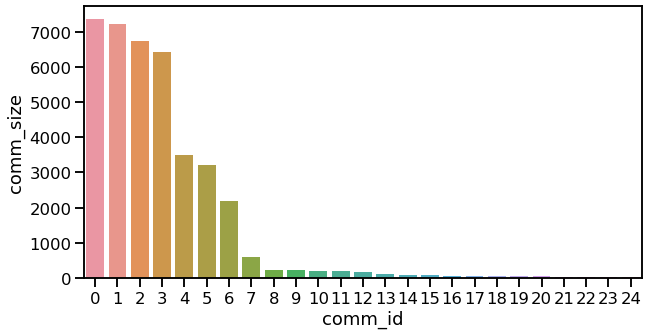

In [ ]:
#HAGO UN GRAFICO
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=densest_communities_df,
           x="comm_id",
           y="comm_size")
plt.show()

<AxesSubplot:xlabel='comm_size', ylabel='Count'>

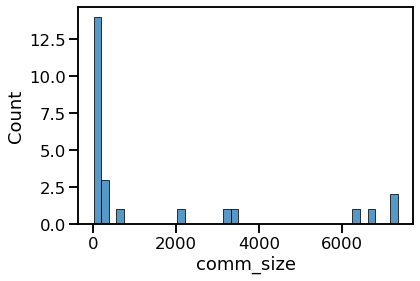

In [ ]:
sns.histplot(data=densest_communities_df,
            x="comm_size",
            bins=40)

# hay 25 comunidades que agrupan el 97% de los tweets

# densidad y modularidad de dichas comunidades.

In [ ]:
print('Modularity:', evaluation.newman_girvan_modularity(dir_G, comms))
print('Modularity Density:', evaluation.modularity_density(dir_G, comms))
print('Cut Ratio:', evaluation.cut_ratio(dir_G, comms))

Modularity: FitnessResult(min=None, max=None, score=0.5754314902268667, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=477.54145657190793, std=None)
Cut Ratio: FitnessResult(min=0.0, max=4.08373542420587e-05, score=2.433048540016517e-06, std=7.331538441877589e-06)


# VARIO RESOLUCION DEL ALGORITMO DE LOUVAIN De 1 a 10 es steps de 1

In [ ]:
resolutions = range(1,10,1)
data = []
for resolution in resolutions:
   
    comms_lv = algorithms.louvain(dir_G, resolution=resolution, randomize=False)
    ncomms = len(comms_lv.communities)
    comms_size = [len(c) for c in comms_lv.communities]
    comms_size.sort()
    modularity = evaluation.newman_girvan_modularity(dir_G, comms_lv).score
    density = evaluation.internal_edge_density(dir_G, comms_lv).score
    data.append((resolution, ncomms, modularity,density, comms_size[-1],  comms_size[-2]))
    
comm_lv_df = pd.DataFrame(data, columns=['resolutions', 'ncomms', 'modularity','density','greatestcomms1', 'greatestcomms2'])
comm_lv_df

,resolutions,ncomms,modularity,density,greatestcomms1,greatestcomms2
0,1,368,0.575431,0.708112,7354,7229
1,2,368,0.530463,0.717005,19378,15292
2,3,353,0.505864,0.718773,22469,15568
3,4,334,0.503776,0.739041,22599,15683
4,5,329,0.502570,0.745784,22680,15734
5,6,325,0.501884,0.752796,22737,15745
6,7,324,0.501654,0.753595,22758,15751
7,8,321,0.500593,0.760027,22868,15750
8,9,320,0.500717,0.762263,22858,15750


## Segun tabla anterior la resolucion del algo de louvain cambia las agrupaciones
## A partir de res=2 parece haber dos grande grupos (comunidades) que contiene los casi 40000 tweets

## Tambien puede verse cuando aumenta la resolución la modularidad disminuye pero la densidad aumenta-. sin embargo la variabilidad a partir de res =2-3 es pequeña

# ALGORTIMO ALTERNATIVO ???. el de Leiden que parece ser un derivado del de Louvain corrió bien. a continuacion se muestra:

In [ ]:
communities_leiden = algorithms.leiden(dir_G)

In [ ]:
communities_leiden_df = pd.DataFrame({
    "communities": communities_leiden.communities,
    "comm_id": np.arange(0, len(communities_leiden.communities))
})

In [ ]:
communities_leiden_df= communities_leiden_df.assign(comm_size=communities_leiden_df["communities"].apply(lambda c: len(c)))

In [ ]:
communities_leiden_df.head(10)

,communities,comm_id,comm_size
0,"[252168075, 1238117630696972289, 37232479, 129...",0,7514
1,"[73102744, 178105343, 2644056245, 4196856351, ...",1,7401
2,"[2737379453, 2258074658, 159909978, 105301854,...",2,6724
3,"[215547565, 146536143, 850481701000237056, 475...",3,4464
4,"[312183888, 574739820, 593228938, 4352026996, ...",4,3733
5,"[730033544999866368, 125077217, 2968944550, 13...",5,3523
6,"[110184114, 585205927, 791699809279287296, 826...",6,3276
7,"[151117172, 1009952582217936896, 9061967888053...",7,534
8,"[427704403, 2374631185, 1212232926168936448, 1...",8,325
9,"[1125176805269352448, 2930136838, 227337716, 8...",9,212


In [ ]:
print('Modularity:', evaluation.newman_girvan_modularity(dir_G, communities_leiden))

print('Modularity Density:', evaluation.modularity_density(dir_G, communities_leiden))

print('Cut Ratio:', evaluation.cut_ratio(dir_G, communities_leiden))

Modularity: FitnessResult(min=None, max=None, score=0.5858121291426898, std=None)
Modularity Density: FitnessResult(min=None, max=None, score=505.1720693070814, std=None)
Cut Ratio: FitnessResult(min=0.0, max=4.4974911092707165e-05, score=3.1623027898850504e-06, std=7.932312632928609e-06)


# NO HAY GRANDES DIFERENCIA ENTRE LOS PARAMETROS ARROJADOS POR ALGO DE LOUVAIN O LEIDEN